#### A continuación se analizarán las ventas de 'Superstore' con el objetivo de identificar cuales son los productos, regiones, categorías y segmentos más rentables de modo tal de ofrecer recomendaciones al supermercado sobre donde concentrar sus recursos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
import requests
import plotly.express as px

In [2]:
repo_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json' 
eeuu_regions_geo = requests.get(repo_url).json()

### Uploading data

In [3]:
data= pd.read_csv("Superstore.csv", encoding='windows-1252',sep=",")
data.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


### Data Cleaning and Transformation

In [4]:
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [5]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [6]:
data['Sales'] = data['Sales'].astype(float)

##### Checking duplicate values

In [7]:
data.duplicated().sum()

0

In [8]:
data['Order ID'].duplicated().sum()

4985

In [9]:
data[data['Order ID']=='CA-2014-100090']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6287,6288,CA-2014-100090,2014-07-08,2014-07-12,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,...,94122,West,FUR-TA-10003715,Furniture,Tables,Hon 2111 Invitation Series Corner Table,502.488,3,0.2,-87.9354
6288,6289,CA-2014-100090,2014-07-08,2014-07-12,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,...,94122,West,OFF-BI-10001597,Office Supplies,Binders,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",196.704,6,0.2,68.8464


Duplicate values are allowed in this dataset, and each value indicates an order with certain characteristics. ‘Order ID’ has duplicate values, however, this is due to the purchase of different products in the same order. 

##### Missing values

In [10]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

##### Distribution of numeric variables

In [11]:
print('Table 1')
data[['Sales','Quantity','Discount','Profit']].describe()

Table 1


,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [12]:
print('Table 2')
data[['Sales','Quantity','Discount','Profit']].quantile([0.33,0.66,0.99])

Table 2


,Sales,Quantity,Discount,Profit
0.33,24.8707,2.0,0.0,3.628800
0.66,122.9514,4.0,0.2,18.097332
0.99,2481.6946,11.0,0.8,580.657882


Table 1 shows descriptive statistics for the numeric variables, Sales, Quantity, Discount, and Profit. At first sight, it can be seen that the difference between the mean value and the median of the Sales and Profit variables could indicate the presence of extreme values, given the sensitivity of the mean to these.

Observing the values in Table 2 and comparing the 99th percentile with the maximum value, a sizeable difference can be seen.

Boxplots


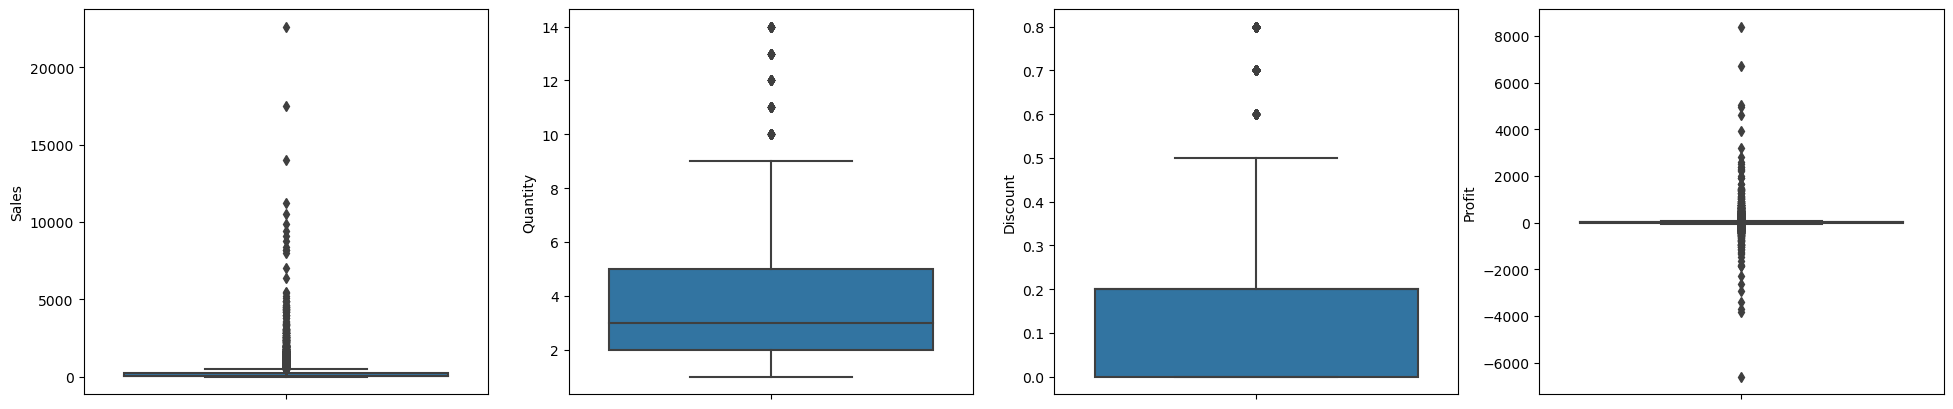

In [13]:
print('Boxplots')
Fig,Axes=plt.subplots(1,4,figsize=(24,5))
sns.boxplot(y='Sales' ,data=data,ax=Axes[0]);
sns.boxplot(y='Quantity' ,data=data,ax=Axes[1]);
sns.boxplot(y='Discount' ,data=data,ax=Axes[2]);
sns.boxplot(y='Profit' ,data=data,ax=Axes[3]);

Histograms


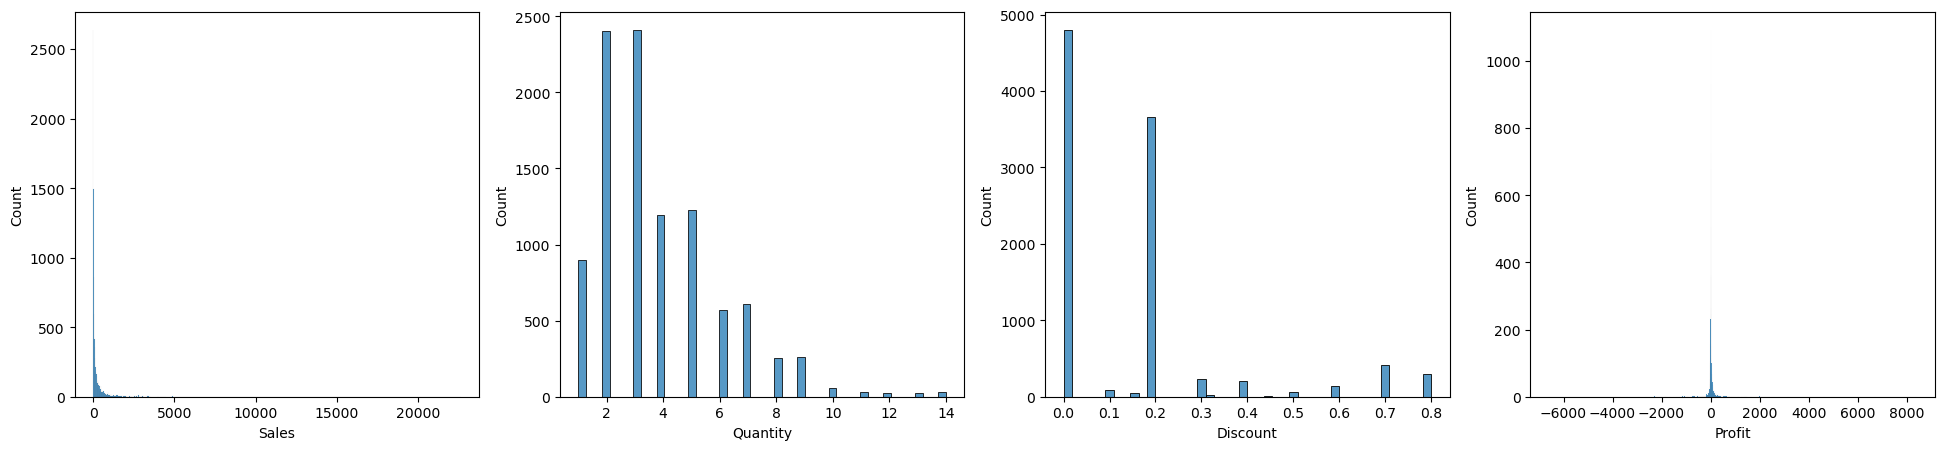

In [14]:
print('Histograms')
Fig,Axes=plt.subplots(1,4,figsize=(24,5))
sns.histplot(data['Sales'],ax=Axes[0]);
sns.histplot(data['Quantity'],ax=Axes[1]);
sns.histplot(data['Discount'],ax=Axes[2]);
sns.histplot(data['Profit'],ax=Axes[3]);

By observing the Boxplots and Histograms of the variables, the existence of extreme values can be confirmed, mainly in the Sales and Profit variables, and to a lesser extent, in Quantity and Discount.

### Feature Engineering

Lead time: This variable allows you to see the number of days it takes between the creation of the order by the customer and the shipment of the company's product to the consumer. The objective of creating this variable is to see what its relationship is with the number of products shipped.

In [15]:
data['Lead_time'] = data['Ship Date'] - data['Order Date']

In [16]:
data['Lead_time'].describe()

count                         9994
mean     3 days 22:59:46.311787072
std      1 days 17:56:29.766161104
min                0 days 00:00:00
25%                3 days 00:00:00
50%                4 days 00:00:00
75%                5 days 00:00:00
max                7 days 00:00:00
Name: Lead_time, dtype: object

Unit Price: Unit price of the product per order. Through this variable, it will be possible to get the average price of each of the products.

In [17]:
data['Unit Price'] = data['Sales']/data['Quantity']

Unit Cost: Unit cost of the product per order. Through this variable, the average cost of each product could be got.

In [18]:
data['Cost'] = data['Sales'] - data['Profit']
data['Unit Cost'] = data['Cost']/data['Quantity']

Margin: Profit margin per order per product. It will allow analyzing sales profitability.

In [19]:
data['Margin'] = (data['Profit']/data['Sales'])*100

### Product analysis

- Total_Sales_Dollars: Sum in dollars of the sale of each of the products
- Total_Profit: Sum in dollars of the profit for each of the products.
- Total_Sales_Units: Sum in units of the sale of each of the products.
- Average_Discount: Average discount applied to the sale of each of the products.
- N_Orders: Number of orders in which the consumer bought the product
- Margin: Profit margin generated by the sale of each of the products.
- days_bt_sale = Days between the first and the last sale of each product
- Weekly_Velocity_Units = Sales velocity in units per product.

In [20]:
Product = data.groupby(
    ["Product ID"], as_index=False).agg(
    Total_Sales_Dollars = ("Sales","sum"),
    Total_Profit = ("Profit","sum"),
    Total_Sales_Units = ("Quantity","sum"),
    Average_Discount = ("Discount","mean"),
    N_Orders = ("Order ID","nunique"),
    )
Product['Margin']=Product['Total_Profit']/Product['Total_Sales_Dollars']

days_bt_sale=(data.groupby(['Product ID'])['Order Date'].max()-data.groupby(['Product ID'])['Order Date'].min()).rename('days_bt_sale').reset_index()
days_bt_sale['days_bt_sale']=days_bt_sale['days_bt_sale'].dt.days

# All metrics in one df
Product=Product.merge(days_bt_sale, on='Product ID', how='left')

Product['Weekly_Velocity_Units'] = ((Product ['Total_Sales_Units']*7)/ Product['days_bt_sale'])

'''Since there are products that were sold in a single order, the days between sales is 0 and
therefore infinite values would be generated in the variable Weekly_Velocity_Units, in these cases,
the variable will take the value 0'''

Product.loc[Product['N_Orders']==1, 'Weekly_Velocity_Units'] = 0


In [21]:
Product.describe()

,Total_Sales_Dollars,Total_Profit,Total_Sales_Units,Average_Discount,N_Orders,Margin,days_bt_sale,Weekly_Velocity_Units
count,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000
mean,1233.727637,153.811505,20.339957,0.150571,5.363050,0.195912,893.433942,0.224576
std,2807.155123,809.742393,11.296593,0.132955,2.660897,0.241730,385.783774,1.113648
min,1.624000,-8879.970400,1.000000,0.000000,1.000000,-2.750000,0.000000,0.000000
25%,95.904000,10.120950,12.000000,0.066667,3.000000,0.082276,670.250000,0.104367
50%,295.452000,44.194050,19.000000,0.110556,5.000000,0.227493,1008.000000,0.148778
75%,1158.591000,139.284300,27.000000,0.200000,7.000000,0.377926,1186.000000,0.206766
max,61599.824000,25199.928000,75.000000,0.800000,18.000000,0.500000,1454.000000,42.000000


As can be seen from the descriptive statistics, on average, the products have 5 orders that include them, a value similar to the median, therefore there are no products with much lower or much higher values that influence.

In [22]:
data['Quantity mean']=data['Quantity']
df_sales_Q=data.groupby(pd.DatetimeIndex(data['Order Date']).year).aggregate({'Sales': 'sum','Quantity': 'sum','Quantity mean':'mean'})
df_sales_Q.head()

,Sales,Quantity,Quantity mean
Order Date,,,
2014,484247.4981,7581,3.803813
2015,470532.5090,7979,3.795909
2016,609205.5980,9837,3.802474
2017,733215.2552,12476,3.766908


<AxesSubplot:title={'center':'Sales evolution'}, xlabel='Order Date'>

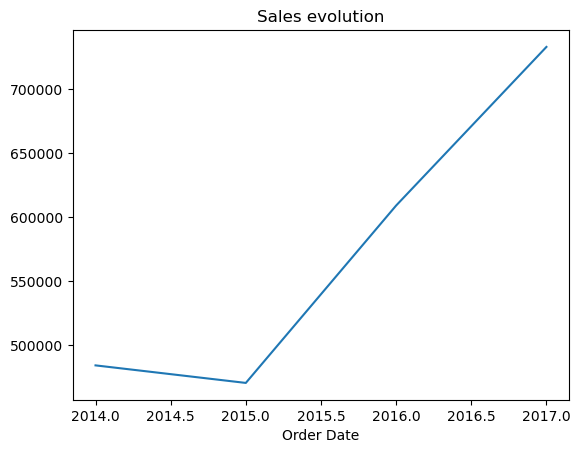

In [54]:
df_sales_Q['Sales'].plot(title = 'Sales evolution')

<AxesSubplot:title={'center':'Quantities evolution'}, xlabel='Order Date'>

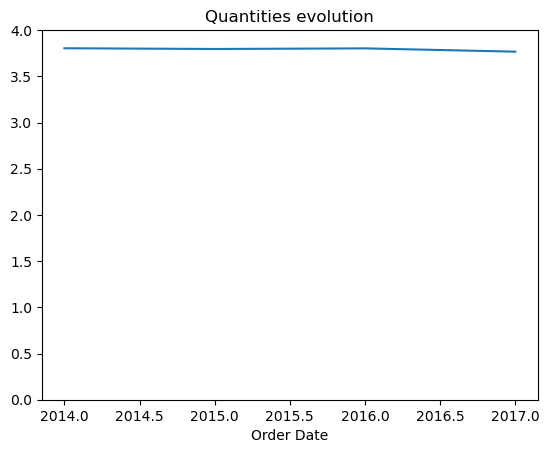

In [57]:
df_sales_Q['Quantity mean'].plot(title = 'Quantities evolution', ylim=(0,4))

We found that three years after sales started, sales grew by 70% (approximately 23% per year). However, we have noticed that the average number of products per sale remains linear over the years.

##### Pareto principle

The Pareto principle is known as the 80/20 rule. Applied to sales, this formula infers that 80% of sales are generated by 20% of the products. This relationship is verified below:

In [58]:
# The cumulative sum of sales in dollars is divided by the total sum to get the cumulative percentage.
data_pareto = Product.sort_values(by='Total_Sales_Dollars', ascending=False)
data_pareto['Total_Sales_Dollars_cum_sum']=data_pareto.Total_Sales_Dollars.cumsum()
data_pareto['Total_Sales_Dollars_Perc']=data_pareto['Total_Sales_Dollars_cum_sum']/data_pareto['Total_Sales_Dollars'].sum()
data_pareto['Product Counter']= range(len(data_pareto))

Pareto principle


<AxesSubplot:xlabel='Product Counter', ylabel='Total_Sales_Dollars_Perc'>

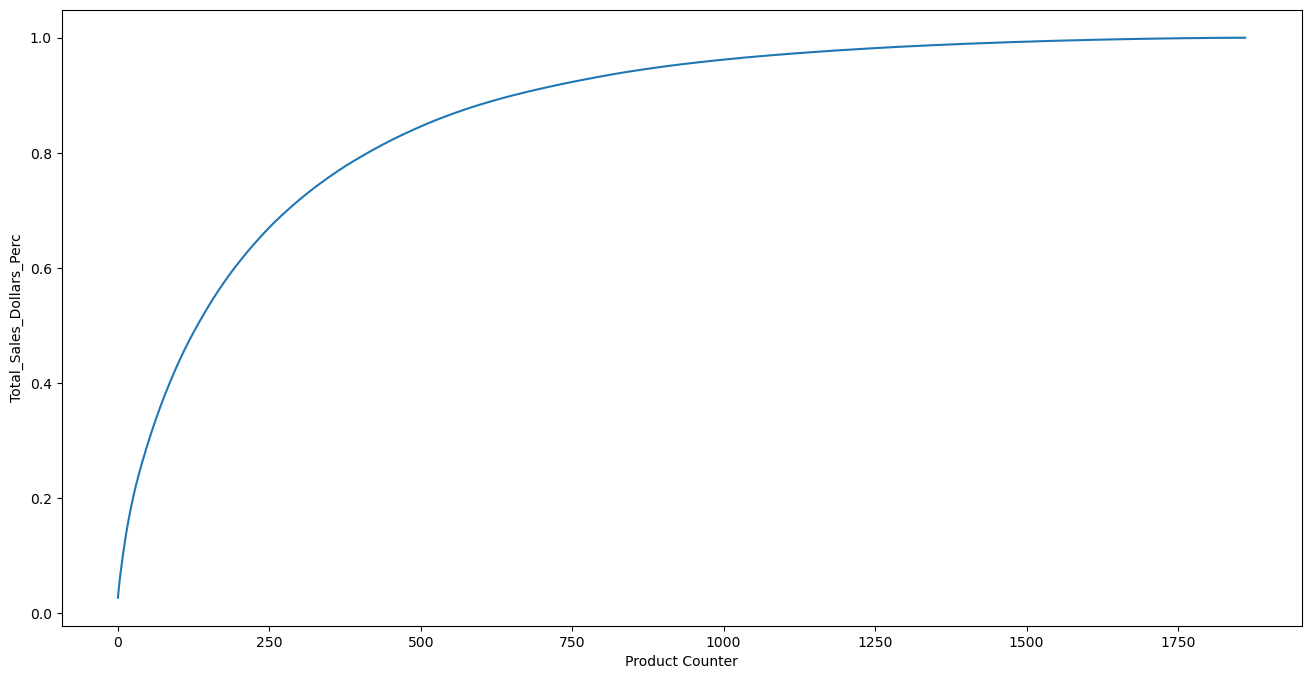

In [59]:
print('Pareto principle')
plt.figure(figsize=(16,8))
sns.lineplot(data = data_pareto, x = "Product Counter", y = "Total_Sales_Dollars_Perc")

As can be seen in the graph, with 413 products, 80% of sales in dollars can be explained. Identifying these products allows us to concentrate resources on them, therefore it is necessary to know what their characteristics are.

In [26]:
Products_Pareto=data_pareto.loc[data_pareto['Total_Sales_Dollars_Perc']<=0.8]

In [27]:
Products_Pareto.describe()

,Total_Sales_Dollars,Total_Profit,Total_Sales_Units,Average_Discount,N_Orders,Margin,days_bt_sale,Weekly_Velocity_Units,Total_Sales_Dollars_cum_sum,Total_Sales_Dollars_Perc,Product Counter
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,4.130000e+02,413.000000,413.000000
mean,4448.527538,490.045656,25.031477,0.163178,6.416465,0.106326,975.489104,0.321208,1.299171e+06,0.565545,206.000000
std,4678.901394,1664.702400,11.996621,0.105380,2.885504,0.185816,351.032414,2.123390,4.448805e+05,0.193662,119.367081
min,1379.920000,-8879.970400,2.000000,0.000000,1.000000,-0.800000,0.000000,0.000000,6.159982e+04,0.026815,0.000000
25%,1947.177000,-20.733200,17.000000,0.080000,4.000000,-0.011518,815.000000,0.126126,1.015928e+06,0.442246,103.000000
50%,2979.004000,354.034800,24.000000,0.160000,6.000000,0.116564,1088.000000,0.166419,1.419604e+06,0.617971,206.000000
75%,5212.112000,733.281200,32.000000,0.200000,8.000000,0.214545,1229.000000,0.233723,1.669033e+06,0.726551,309.000000
max,61599.824000,25199.928000,75.000000,0.533333,18.000000,0.500000,1454.000000,42.000000,1.837242e+06,0.799774,412.000000


In [60]:
#List with the identified products, to filter them in the orders table
Products_Pareto_list=Products_Pareto['Product ID'].to_list()

aux=data['Product ID'].isin(Products_Pareto_list)

Orders_Pareto=data[aux]

In [79]:
print('Where are these products sold?','\n\n',Orders_Pareto[['State']].value_counts(),'\n\n',Orders_Pareto[['Region']].value_counts(),'\n\n', 'How are these products characterized?','\n\n', Orders_Pareto[['Segment']].value_counts(),'\n\n',Orders_Pareto[['Category']].value_counts(),'\n\n',Orders_Pareto[['Sub-Category']].value_counts())

Where are these products sold? 

 State               
California              523
New York                315
Texas                   250
Pennsylvania            157
Washington              138
Illinois                131
Ohio                    122
Florida                  98
Michigan                 80
North Carolina           64
Arizona                  63
Virginia                 62
Georgia                  51
Colorado                 44
Tennessee                41
Kentucky                 40
Massachusetts            37
Indiana                  36
Wisconsin                35
New Jersey               31
Oregon                   30
Maryland                 28
Oklahoma                 25
Minnesota                24
Delaware                 23
Alabama                  22
Missouri                 20
Rhode Island             19
Connecticut              16
Mississippi              15
South Carolina           13
Arkansas                 12
Utah                     11
Louisiana            

As can be seen, most of these products are sold in California and New York. If you consider the regions of the country, the majority are sold in the west.


These products belong mostly to the consumer segment and to the furniture category, particularly chairs.

In [62]:
#Average lead time
Orders_Pareto['Lead_time'].mean()

3.9182674199623353

The average number of days between the order being generated, and the product being shipped is 3 days for these products, equal to the average lead time for all the products.

##### Most profitable products

If you want to reduce the number of products in which you want to concentrate the resources, two variables will be prioritized. On the one hand, the margin will make it possible to identify the products that generate the highest profit percentage and also those with a higher sales speed.

In [31]:
#List with the identified products
Products_Pareto_list_top=Products_Pareto['Product ID'].to_list()

aux1=data['Product ID'].isin(Products_Pareto_list_top)

Orders_Pareto_top=data[aux1]

In [32]:
Product_High_Margin_WVelocity=Products_Pareto.loc[(Products_Pareto['Margin']>=Products_Pareto['Margin'].mean())&(Products_Pareto['Weekly_Velocity_Units']>=Products_Pareto['Weekly_Velocity_Units'].mean())]

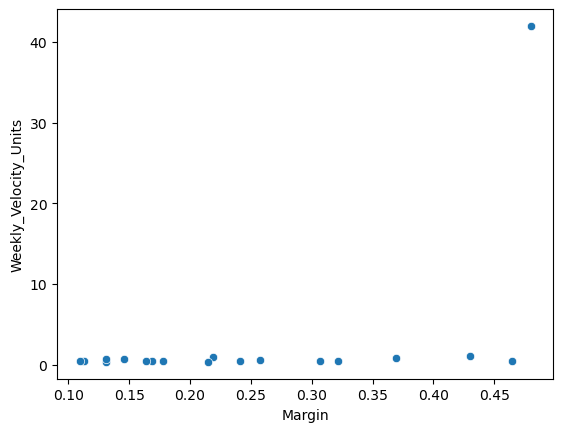

In [63]:
#Products Scatter Plot by Margin and Weekly Velocity
sns.scatterplot(x=Product_High_Margin_WVelocity['Margin'] ,y=Product_High_Margin_WVelocity['Weekly_Velocity_Units']);

In [65]:
print('Where are these products sold?: Orders quantity ','\n\n',Orders_Pareto_top[['State']].value_counts(),'\n\n',Orders_Pareto_top[['Region']].value_counts(),'\n\n', 'How are these products characterized?','\n\n', Orders_Pareto_top[['Segment']].value_counts(),'\n\n',Orders_Pareto_top[['Category']].value_counts(),'\n\n',Orders_Pareto_top[['Sub-Category']].value_counts())

Where are these products sold?: Orders quantity  

 State               
California              523
New York                315
Texas                   250
Pennsylvania            157
Washington              138
Illinois                131
Ohio                    122
Florida                  98
Michigan                 80
North Carolina           64
Arizona                  63
Virginia                 62
Georgia                  51
Colorado                 44
Tennessee                41
Kentucky                 40
Massachusetts            37
Indiana                  36
Wisconsin                35
New Jersey               31
Oregon                   30
Maryland                 28
Oklahoma                 25
Minnesota                24
Delaware                 23
Alabama                  22
Missouri                 20
Rhode Island             19
Connecticut              16
Mississippi              15
South Carolina           13
Arkansas                 12
Utah                     11
Lou

Most of these products are sold in California and New York. If you consider the regions of the country, most are sold in the west.

These products belong mostly to the consumer segment and to the technology category and in particular the accessories subcategory.

In [66]:
Orders_Pareto_top.groupby(['Product Name','Category'])[['Sales']].sum().sort_values(by='Sales', ascending=False)

,,Sales
Product Name,Category,
Canon imageCLASS 2200 Advanced Copier,Technology,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,Office Supplies,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,Technology,22638.480
HON 5400 Series Task Chairs for Big and Tall,Furniture,21870.576
GBC DocuBind TL300 Electric Binding System,Office Supplies,19823.479
...,...,...
Xerox 1881,Office Supplies,454.360
RCA H5401RE1 DECT 6.0 4-Line Cordless Handset With Caller ID/Call Waiting,Technology,239.970
Eldon 500 Class Desk Accessories,Furniture,197.948


### State analysis

In [80]:
print('Sales Percentage by Region')
df_salesByRegion=data.groupby(['Region'],as_index=False).agg(Sales = ('Sales', 'sum')).sort_values(by='Sales', ascending=False)
df_salesByRegion['Sales %']=(df_salesByRegion['Sales']/df_salesByRegion['Sales'].sum())*100
df_salesByRegion.head()

Sales Percentage by Region


,Region,Sales,Sales %
3,West,725457.8245,31.580078
1,East,678781.2400,29.548188
0,Central,501239.8908,21.819594
2,South,391721.9050,17.052140


As seen in the table, the East and West regions generate 60% of sales

In [67]:
print('Sales Percentage by State')
df_salesByState=data.groupby(['State'],as_index=False).agg(Sales = ('Sales', 'sum')).sort_values(by='Sales', ascending=False)
df_salesByState['Sales %']=(df_salesByState['Sales']/df_salesByState['Sales'].sum())*100
df_salesByState.head()


Sales Percentage by State


,State,Sales,Sales %
3,California,457687.6315,19.923710
30,New York,310876.2710,13.532829
41,Texas,170188.0458,7.408497
45,Washington,138641.2700,6.035226
36,Pennsylvania,116511.9140,5.071908


In [38]:
df_salesByState.tail()

,State,Sales,Sales %
48,Wyoming,1603.136,0.069786
39,South Dakota,1315.560,0.057268
17,Maine,1270.530,0.055308
46,West Virginia,1209.824,0.052665
32,North Dakota,919.910,0.040045


In [81]:
fig = px.choropleth(data_frame=df_salesByState, 
                    geojson=eeuu_regions_geo, 
                    locations='State', 
                    featureidkey='properties.name', 
                    color='Sales', 
                    color_continuous_scale="burg", 
                   )
fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")

fig.update_layout(
    title_text = 'Sales distribution',
    font=dict(
        
        family="Ubuntu",
        size=18,
        color="#7f7f7f"
    ),
    annotations = [dict(
        x=0.55,
        y=-0.1,
        xref='paper',
        yref='paper',
        showarrow = False
    )]
)

fig.show()

The state of California and New York concentrate the highest percentage of sales (approximately 35% between them). On the other hand, the states of North Dakota and West Virginia are the ones with the lowest percentage.

In [68]:
print('Quantity sold by Category for the states of New York and California')
data[(data['State']=='California')|(data['State']=='New York')].groupby(['Category'])[['Quantity']].sum().sort_values(by='Quantity',ascending=False)

Quantity sold by Category for the states of New York and California


,Quantity
Category,
Office Supplies,7151
Furniture,2573
Technology,2167


### Categories and Subcategories analysis

In [69]:
data.groupby(['Category']).aggregate({'Profit': 'sum','Quantity':'sum','Discount': 'mean'}).sort_values(by='Profit',ascending=False)

,Profit,Quantity,Discount
Category,,,
Technology,145454.9481,6939,0.132323
Office Supplies,122490.8008,22906,0.157285
Furniture,18451.2728,8028,0.173923


The Technology category is the one that generates the highest profits, selling the fewest number of units and with the lowest discount percentage. A recommendation could be to increase the discounts on the category, which could lead to an increase in the quantities sold and possibly in profits.

In [71]:
print('Orders quantity, discounts, sales in $ and profit by sub-category')
subcategory_info = data.groupby(['Category','Sub-Category']).aggregate({'Order ID': 'count','Discount': 'mean' , 'Sales': 'sum', 'Quantity': 'sum', 'Profit': 'sum'})
subcategory_info.sort_values(by='Profit',ascending=False)

Orders quantity, discounts, sales in $ and profit by sub-category


Order ID  Discount        Sales  Quantity  \
Category        Sub-Category                                              
Technology      Copiers             68  0.161765  149528.0300       234   
                Phones             889  0.154556  330007.0540      3289   
                Accessories        775  0.078452  167380.3180      2976   
Office Supplies Paper             1370  0.074891   78479.2060      5178   
                Binders           1523  0.372292  203412.7330      5974   
Furniture       Chairs             617  0.170178  328449.1030      2356   
Office Supplies Storage            846  0.074704  223843.6080      3158   
                Appliances         466  0.166524  107532.1610      1729   
Furniture       Furnishings        957  0.138349   91705.1640      3563   
Office Supplies Envelopes          254  0.080315   16476.4020       906   
                Art                796  0.074874   27118.7920      3000   
                Labels             364  0.068681   12486.3120      1400   
Technology      Machines           115  0.306087  189238.6310       440   
Office Supplies Fasteners          217  0.082028    3024.2800       914   
                Supplies           190  0.076842   46673.5380       647   
Furniture       Bookcases          228  0.211140  114879.9963       868   
                Tables             319  0.261285  206965.5320      1241   

                                  Profit  
Category        Sub-Category              
Technology      Copiers       55617.8249  
                Phones        44515.7306  
                Accessories   41936.6357  
Office Supplies Paper         34053.5693  
                Binders       30221.7633  
Furniture       Chairs        26590.1663  
Office Supplies Storage       21278.8264  
                Appliances    18138.0054  
Furniture       Furnishings   13059.1436  
Office Supplies Envelopes      6964.1767  
                Art            6527.7870  
                Labels         5546.2540  
Technology      Machines       3384.7569  
Office Supplies Fasteners       949.5182  
                Supplies      -1189.0995  
Furniture       Bookcases     -3472.5560  
                Tables       -17725.4811

Within the technology category, the copiers subcategory is the one that generates the highest profits, followed by telephones and accessories. It should be noted that the copier’s subcategory achieves great profitability with few units sold

In [72]:
print('Most profitable products')
data.groupby(['Product Name', 'Category'])[['Profit']].sum().sort_values(by='Profit',ascending=False).head(10)

Most profitable products


,,Profit
Product Name,Category,
Canon imageCLASS 2200 Advanced Copier,Technology,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,Office Supplies,7753.0390
Hewlett Packard LaserJet 3310 Copier,Technology,6983.8836
Canon PC1060 Personal Laser Copier,Technology,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",Technology,4094.9766
Ativa V4110MDD Micro-Cut Shredder,Technology,3772.9461
"3D Systems Cube Printer, 2nd Generation, Magenta",Technology,3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System,Technology,3696.2820
Ibico EPK-21 Electric Binding System,Office Supplies,3345.2823


### Segment analysis

In [73]:
print('Sales percentage by segment')
data['Sales percentage'] = (data['Sales'] / data['Sales'].sum())*100
data_segm=data.groupby('Segment',as_index=False)[['Sales percentage']].sum()
data_segm

Sales percentage by segment


,Segment,Sales percentage
0,Consumer,50.557240
1,Corporate,30.739426
2,Home Office,18.703334


Sales percentage by segment


<AxesSubplot:xlabel='Segment', ylabel='Sales percentage'>

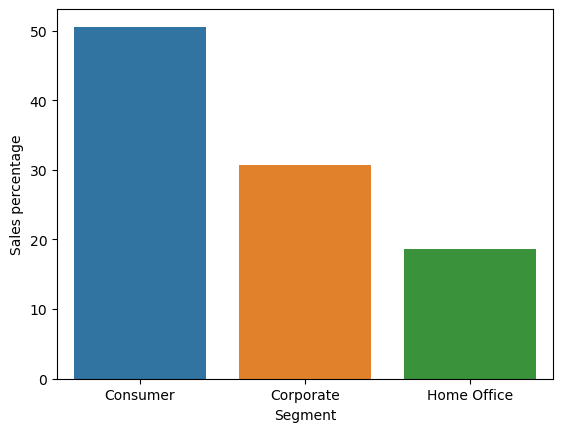

In [70]:
print('Sales percentage by segment')
sns.barplot(x='Segment', y='Sales percentage', data=data_segm)

In [74]:
print('Orders quantity, discounts, quantities and profits by segments')
segment_info = data.groupby('Segment').aggregate({'Order ID': 'count','Discount': 'mean', 'Quantity': 'sum', 'Profit': 'sum'})
segment_info

Orders quantity, discounts, quantities and profits by segments


,Order ID,Discount,Quantity,Profit
Segment,,,,
Consumer,5191,0.158141,19521,134119.2092
Corporate,3020,0.158228,11608,91979.1340
Home Office,1783,0.147128,6744,60298.6785


In [75]:
print('Sales evolution by segment')
df_sales_Q_segment=data.groupby([pd.DatetimeIndex(data['Order Date']).year,'Segment']).aggregate({'Order ID': 'count'})
df_sales_Q_segment=df_sales_Q_segment.reset_index()
df_sales_Q_segment

Sales evolution by segment


,Order Date,Segment,Order ID
0,2014,Consumer,1070
1,2014,Corporate,611
2,2014,Home Office,312
3,2015,Consumer,1125
4,2015,Corporate,636
5,2015,Home Office,341
6,2016,Consumer,1328
7,2016,Corporate,793
8,2016,Home Office,466
9,2017,Consumer,1668


Orders quantity evolution by segment


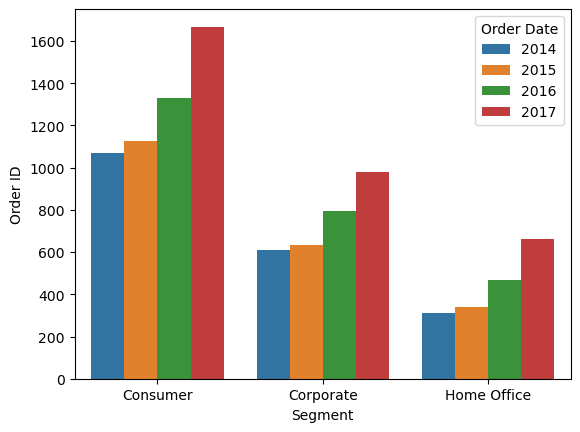

In [78]:
print('Orders quantity evolution by segment')
sns.barplot(x='Segment', y='Order ID', data=df_sales_Q_segment, hue='Order Date'); 

Average delivery time per segment

In [49]:
data.groupby(['Segment']).aggregate({'Lead_time': 'mean'}).head(50)

,Lead_time
Segment,
Consumer,3 days 22:36:13.454055095
Corporate,4 days 00:10:58.013245033
Home Office,3 days 22:07:44.385866517


In [50]:
data.groupby(['Segment','Category']).aggregate({'Lead_time': 'mean'}).head(50)

Lead_time
Segment     Category                                 
Consumer    Furniture       3 days 21:05:20.215633423
            Office Supplies 3 days 23:11:11.186440677
            Technology      3 days 22:27:38.044164037
Corporate   Furniture       3 days 23:33:15.046439628
            Office Supplies 4 days 00:17:24.395604395
            Technology      4 days 00:33:47.436823104
Home Office Furniture       3 days 22:04:38.453038674
            Office Supplies 3 days 23:38:38.813716404
            Technology      3 days 17:24:12.631578947

The average delivery time per segment is homogeneous, even increasing the granularity per category.

I think it would not be necessary to take any action on the delivery time by segment.

Categories with more orders per segment

In [51]:
df_sales=data.groupby(['Segment','Category'])[['Order ID']].count().sort_values(by='Order ID',ascending=False).head(50)

In [52]:
df_sales['% sobre el total']= df_sales['Order ID']/df_sales['Order ID'].sum()
df_sales

Order ID  % sobre el total
Segment     Category                                   
Consumer    Office Supplies      3127          0.312888
Corporate   Office Supplies      1820          0.182109
Consumer    Furniture            1113          0.111367
Home Office Office Supplies      1079          0.107965
Consumer    Technology            951          0.095157
Corporate   Furniture             646          0.064639
            Technology            554          0.055433
Home Office Furniture             362          0.036222
            Technology            342          0.034221

Almost 50% of the orders are made in products of the category "Office Supplies"

### Correlation Matrix

,Sales,Quantity,Profit,Discount,Lead_time
Sales,1.000000,0.200795,0.479064,-0.028190,-0.007354
Quantity,0.200795,1.000000,0.066253,0.008623,0.018298
Profit,0.479064,0.066253,1.000000,-0.219487,-0.004649
Discount,-0.028190,0.008623,-0.219487,1.000000,0.000408
Lead_time,-0.007354,0.018298,-0.004649,0.000408,1.000000


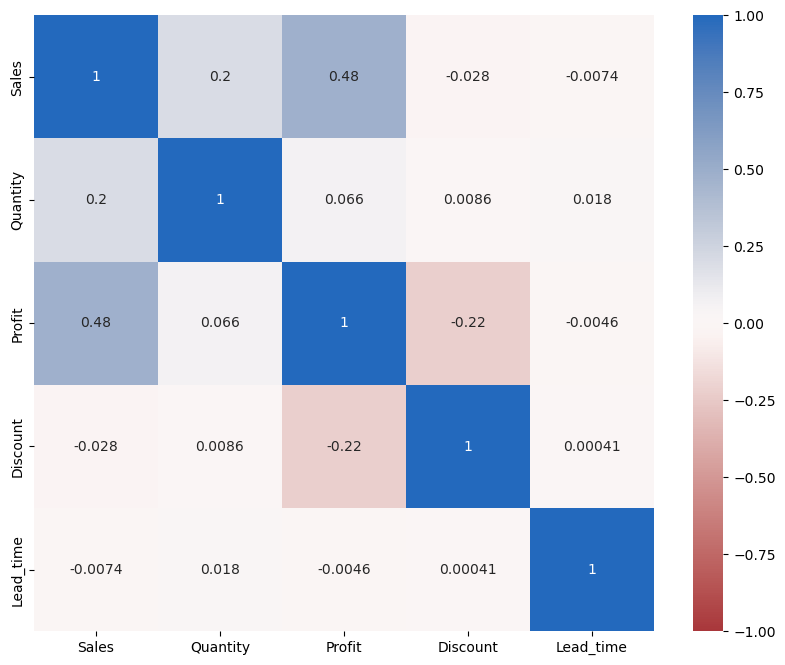

In [53]:
data['Lead_time']=data['Lead_time'].dt.days
data['Lead_time']=data['Lead_time'].astype(int)
data_numeric=data[['Sales','Quantity','Profit','Discount','Lead_time']]
mat_corr = data_numeric.corr()
display(mat_corr)

fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(mat_corr,annot=True,ax=ax,cmap="vlag_r",center=0,vmin=-1,vmax=1);

There are no strong correlations between the variables. However, it is interesting to highlight the indirect relationship between the Lead Time variable with Sales and Profit and direct with the quantities. This can make us think that the longer the waiting time, the lower the sales in dollars and profits (and vice versa), and that the greater the quantities sold, the longer the waiting time (and vice versa).

### Conclusions

Analyzing sales allows us to observe their characteristics, the most relevant products that the company sells, the categories to which they belong, the geographical areas with the strongest sales, etc. This allows us to suggest some recommendations based on the evidence of the data:

   - As previously shown, 80% of these are concentrated in 20% of the products, therefore it would be optimal to concentrate resources on them.
   
   - I would recommend paying attention to the 18 products that generate the highest margin and have the highest speed of sale. One suggestion could be to increase efforts in marketing campaigns that increase the popularity of these products in the central and southern regions of the country.
    
   - The products with the highest discount percentage are those that generate the least number of units sold, so the policy could be modified when assigning them, in such a way that it could attract more sales.
    
   - It has been observed that 60% of sales are concentrated in the eastern and western regions of the country.
    
   - The states of California and New York concentrate 35% of the accumulated sales in dollars. A possible marketing strategy could be to increase the promotion actions of the categories with less traction as has been seen the Technology category is the one that sells the least, and yet it is the one that generates the highest profits, so it would be optimal to make a more aggressive sales strategy on this category.
    
   - The consumer segment is the one that makes the most sales, above the corporate or Home Office. In addition, the proportion between the different categories remains stable, with the consumer segment always being in the first place, corporate in the second, and Home Office third.
    
   - Over the years, the proportion of orders generated by segment has been maintained. However, the data goes up to the year 2017. Probably if the data goes up to today, the proportions between corporate and home office would be inverted given the context of the pandemic that the world went through and the increase in remote work by the companies. Given that this relationship is likely to continue, a good recommendation would be to concentrate efforts on this segment.
    